# Author  :     OUMAYMA KRIAT





# TSF  -   Data Science & Business Analytics Internship

# Task 1 -  Prediction using Supervised Machine Learning

#### In this task we have to predict  the percentage of marks of a student based on the number of study hours. 



## 1- Importing libraries 

In [2]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns
sns.set()
%matplotlib inline


## 2- Importing Data

In [3]:
url="http://bit.ly/w-data"
df=pd.read_csv(url)
df.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## 3- Exploring Data

In [4]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
df.shape

(25, 2)

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
# null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

## 4- Visualizing Data

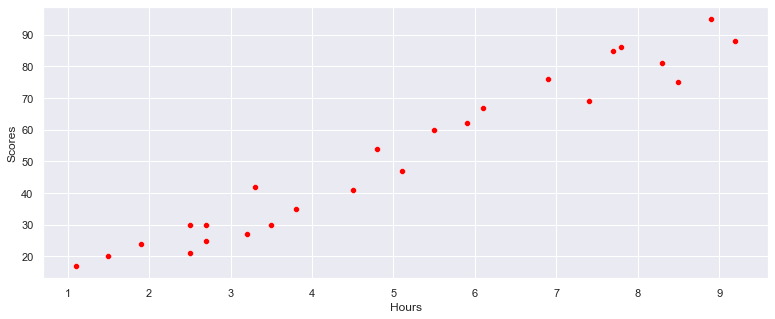

In [50]:
# scores distributon in scatterplot
sns.scatterplot(data = df,x='Hours', y='Scores', color = 'red')
plt.show()

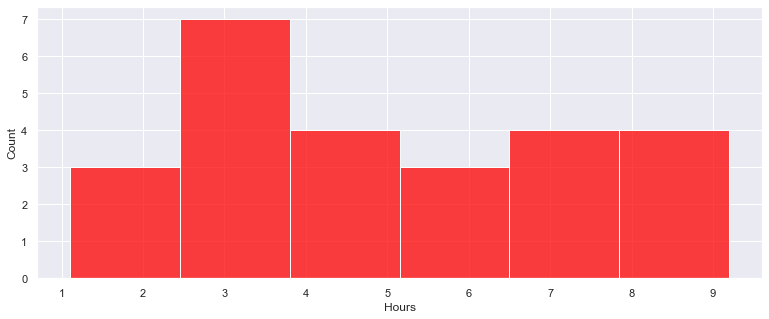

In [51]:
# Hours Distributon in Histogram
sns.histplot(data = df,x='Hours',color = 'red')
plt.show()

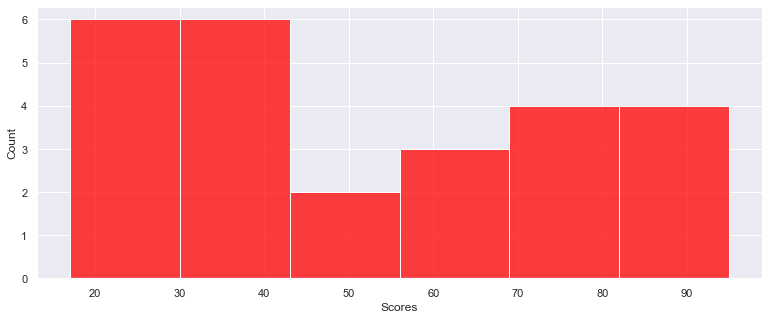

In [52]:
# Scores Distributon in Histogram
sns.histplot(data = df,x='Scores',color = 'red')
plt.show()

## 5- Checking the correlations

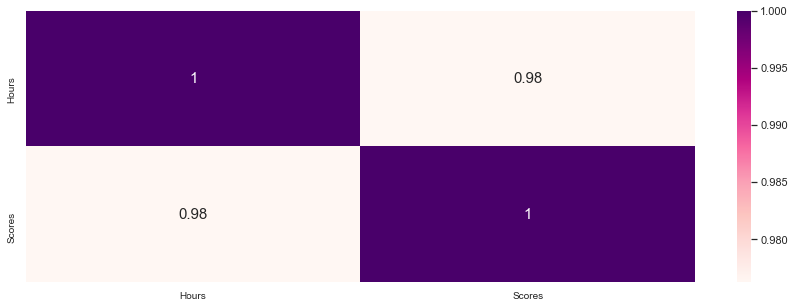

In [54]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True,cmap="RdPu",annot_kws={'fontsize':15})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## 6- Preparing Data 

In [14]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [15]:
#using iloc function we will divide the data
X = df.iloc[:, :1].values
Y = df.iloc[:, 1:].values


In [16]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [17]:
Y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [55]:
#Splitting data into training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=0)
                          

## 7- Training the model

In [56]:
from sklearn.linear_model import LinearRegression  

model = LinearRegression()  
model.fit(X_train, Y_train) 
print("Training complete.")

Training complete.


In [58]:
print("The coefficient is:")
model.coef_

The coefficient is:


array([[9.91065648]])

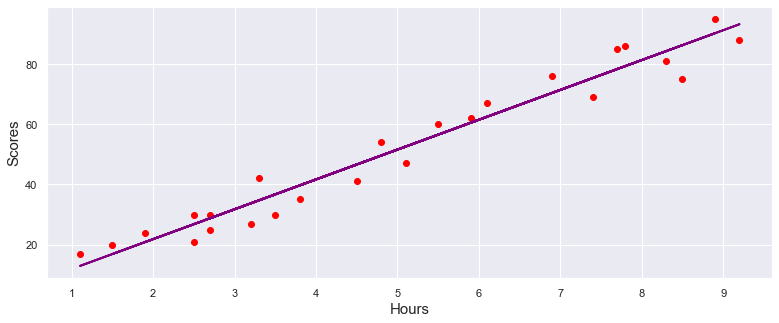

In [83]:
lmodel=model.coef_*X + model.intercept_

# Plotting the Regression Graph 

plt.scatter(X,Y, color='red')
plt.plot(X,lmodel, c='purple', lw=2)
plt.xlabel('Hours', fontsize=15)
plt.ylabel('Scores', fontsize=15)
plt.show()

## 8- Making Predictions

In [69]:
print(X_test)
y_pred = model.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [70]:
Y_test

array([[20],
       [27],
       [69],
       [30],
       [62]], dtype=int64)

In [23]:
y_pred


array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [85]:
#comparing the Actual vs the Predicted score
comparison= pd.DataFrame({'Actual':[Y_test],'Predictd':[y_pred]})
comparison

,Actual,Predictd
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398037], [33.73226077948984], [7..."


In [84]:
# Predicting student's score if he studies for 9.25 hr
hours = 9.25
pred = model.predict(np.array(hours).reshape(-1,1))
print("Number of study Hours  = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

Number of study Hours  = 9.25
Predicted Score = [93.69173249]


## 9- Evaluating the model

In [82]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))

Mean Absolute Error: 4.183859899002975
